In [ ]:
import matplotlib.pyplot as plt

from sklearn.cluster import BisectingKMeans, KMeans
from sklearn.datasets import make_blobs

In [ ]:
n_samples = 7000
random_state = 0

X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

n_clusters_list = [4, 8, 16]

clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

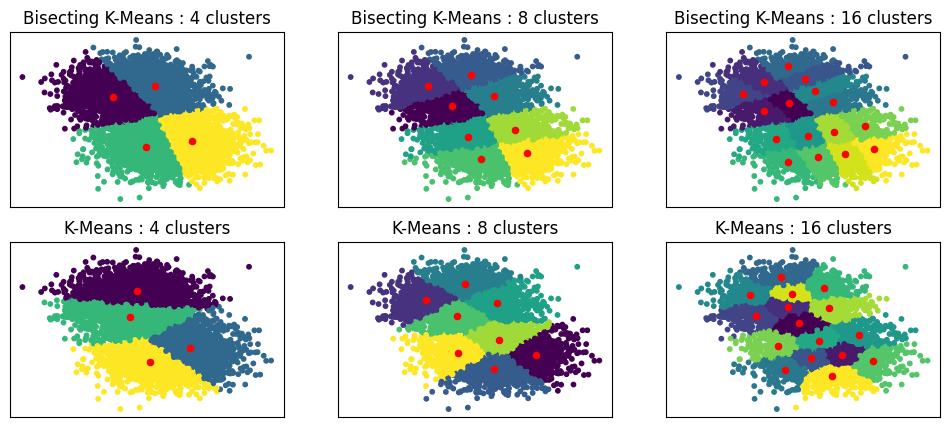

In [ ]:
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)

axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])